In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense, Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation, Conv2D
from keras.models import Model, Sequential
from keras.layers import Conv2D, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam
from keras.datasets import  fashion_mnist

(6000, 28, 28)

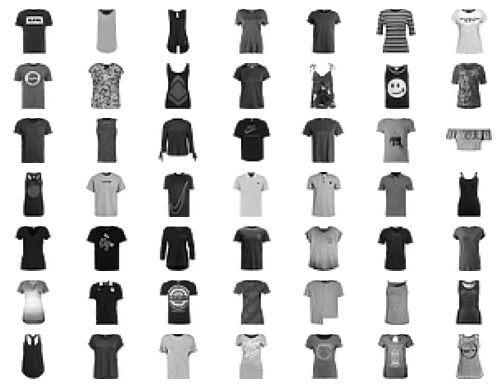

In [2]:
def cargar_imagenes():
    (Xtrain, Ytrain), (_, _) = fashion_mnist.load_data()

    # Nos quedamos con las camiseta
    indice = np.where(Ytrain == 0)
    indice = indice[0]
    Xtrain = Xtrain[indice, :,:]
    # Normalizamos los datos
    X = Xtrain.astype('float32') / 255.0
    return X

dataset = cargar_imagenes()

for i in range(49):
  plt.subplot(7, 7, 1 + i)
  plt.axis('off')
  plt.imshow(dataset[i], cmap="binary")

dataset.shape

In [3]:
print("Discriminador:")
discriminador = Sequential()
discriminador.add(Conv2D(8, kernel_size=3, padding="same", input_shape = (28,28,1), activation="relu"))
discriminador.add(MaxPool2D())
discriminador.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))
discriminador.add(MaxPool2D())
discriminador.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
discriminador.add(MaxPool2D())
discriminador.add(Flatten())
discriminador.add(Dense(32, activation="relu"))
discriminador.add(Dense(1, activation="sigmoid"))
discriminador.summary()

Discriminador:


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,409 (153.94 KB)

 Trainable params: 39,409 (153.94 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
optimizer = Adam(learning_rate=0.0001)
discriminador.compile(loss="binary_crossentropy", optimizer = optimizer, metrics=["accuracy"])

In [5]:
print("Generador:")
generador = Sequential()
generador.add(Dense(32, input_shape=(1,), activation="relu"))
generador.add(Dense(576, activation="relu"))
generador.add(Reshape((3,3,64)))
generador.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding="valid", activation="relu"))
generador.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding="same", activation="relu"))
generador.add(Conv2DTranspose(8, kernel_size=3, strides=2, padding="same", activation="relu"))
generador.add(Conv2DTranspose(1, kernel_size=3, strides=1, padding="same", activation="sigmoid"))
generador.summary()

Generador:


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 576)            │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 8)      │         2,312 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │            73 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,849 (300.19 KB)

 Trainable params: 76,849 (300.19 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
print("Gan:")
gan = Sequential()
gan.add(generador)
gan.add(discriminador)
opt = Adam(learning_rate=0.0001)
gan.compile(loss="binary_crossentropy", optimizer = opt, metrics=["accuracy"])
gan.summary()

Gan:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │        76,849 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │        39,409 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,258 (454.13 KB)

 Trainable params: 116,258 (454.13 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def get_datos_reales(nmuestras):
  max_len = dataset.shape[0]
  ix = np.random.randint(0, max_len, nmuestras)
  X = dataset[ix]
  print(X.shape)
  y = np.ones((nmuestras, 1))
  return X,y

def get_datos_fake(nmuestras):
  input = np.random.randn(nmuestras)
  X = np.squeeze(generador.predict(input))
  print(X.shape)
  y = np.zeros((nmuestras,1))
  return X,y

In [8]:
def entrenamiento(epochs=1, batch_size=128):
  max_len = dataset.shape[0]
  nbatchs = int(max_len / batch_size)

  for epoch in range(epochs):
    print("Epoch : ", epoch)
    for batch in range(nbatchs):
      # entrenar discriminador
      discriminador.trainable = True
      X_real, y_real = get_datos_reales(batch_size//2)
      loss_real, acc_real = discriminador.train_on_batch(X_real, y_real)
      X_fake, y_fake = get_datos_fake(batch_size//2)
      loss_fake, acc_fake = discriminador.train_on_batch(X_fake, y_fake)
      discriminador.trainable = False
      # entrenar generador (a través de la gan completa)
      X_gan = np.random.randn(batch_size).reshape(batch_size, 1)
      y_gan = np.ones((batch_size,1))
      loss_gan, acc_gan, _, _ = gan.train_on_batch(X_gan, y_gan)
      print(f"Epoch: {epoch} - batch: {batch}")
      print(f"loss_real: {loss_real} loss_fake: {loss_fake} loss_gan: {loss_gan}")
      print(f"acc_real: {acc_real} acc_fake: {acc_fake} acc_gan: {acc_gan}")

In [9]:
entrenamiento()

Epoch :  0
(64, 28, 28)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
(64, 28, 28)
Epoch: 0 - batch: 0
loss_real: 0.6952030062675476 loss_fake: 0.6969897150993347 loss_gan: 0.6969897150993347
acc_real: 0.390625 acc_fake: 0.1953125 acc_gan: 0.6969897150993347
(64, 28, 28)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(64, 28, 28)
Epoch: 0 - batch: 1
loss_real: 0.6935084462165833 loss_fake: 0.6948221921920776 loss_gan: 0.6948221921920776
acc_real: 0.4114583432674408 acc_fake: 0.30859375 acc_gan: 0.6948221921920776
(64, 28, 28)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(64, 28, 28)
Epoch: 0 - batch: 2
loss_real: 0.6917372941970825 loss_fake: 0.6928430199623108 loss_gan: 0.6928430199623108
acc_real: 0.4375 acc_fake: 0.3645833432674408 acc_gan: 0.6928430199623108
(64, 28, 28)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
(64, 28, 28)
Epoch: 0 - batch: 3
loss_real: 0.6902838945388794 loss_fake: 0.6912184953689575 loss_gan: 0.6912184953689575
acc_real: 0.453125 acc_fake: 0.396484375 acc_gan: 0.6912184953689575
(64, 28,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


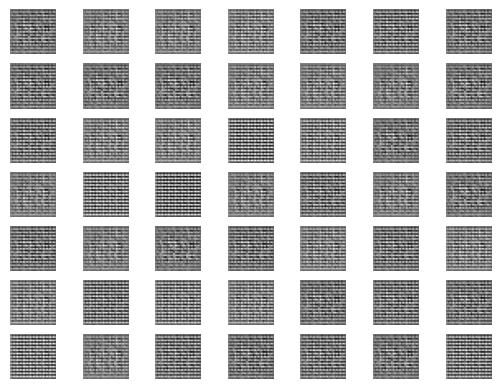

In [10]:
X_pru = np.random.randn(49)
generadas = generador.predict(X_pru)
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.axis('off')
  plt.imshow(generadas[i], cmap="binary")
plt.show()